In [17]:
#从网页爬取数据 使用post方法请求网页得到相应的数据
import requests
payload = {'startDate':'2019-10-01','endDate':'2019-12-01','queryYN':'true'}
res = requests.post('http://www.safe.gov.cn/AppStructured/hlw/RMBQuery.do', data = payload)
res.text

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<META http-equiv=Content-Type content="text/html; charset=UTF-8">\n\t\t<title>人民币汇率中间价</title>\n\t\t\t<link rel="stylesheet" type="text/css" href="/AppStructured/res/css/css.css" />\n\t\t\t\n\t\t\t<script type="text/javascript"  src="/AppStructured/res/common/jquery/jquery-1.4.2.js"/></script>\n\t\t\t<script type="text/javascript"  src="/AppStructured/res/js/datepicker/WdatePicker.js"/></script>\n<script type="text/javascript">\n\nfunction validate() {\n\n\t\t//var currencyId = document.getElementById("currencyId").value;\n\t\tvar startDateId = document.getElementById("startDateId").value;\n\t\tvar endDateId = document.getElementById("endDateId").value;\n\t\t//document.cookie="xs=true";\n\t\t\n\n\t\t//if(currencyId==\'\'){\n\t\t//\talert("币种 不能为空,请选择!");\n\t\t///\treturn false;\n\t\t//}\n\t\t//\tif(startDateId==\'\'){\n\t\t//\t\talert("开始日期 不能为空,请选择!");\n\t\t//\t\treturn false;\n\t\t//\t}\n\t\t//\tif(endDateId==\'\'){\n\t\t//\t\talert("结束日期 不能为空,

In [49]:
#res.text
#选择需要的数据抓取
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')
#表格的数据抓取后需要进行一定优化
print(soup.select('#InfoTable')[0])
type(soup.select('#InfoTable')[0].prettify())

<table align="center" border="0" cellpadding="3" cellspacing="1" class="list" id="InfoTable" width="100%">
<tr>
<th class="table_head" id="comtemplatename" style="cursor:'default'" width="12%">日期</th>
<th class="table_head" id="comtemplatename" style="cursor:'default'" width="8%">
<!-- <s:property  value="currency"/>&nbsp; -->
											美元
											</th>
<th class="table_head" id="comtemplatename" style="cursor:'default'" width="8%">
<!-- <s:property  value="currency"/>&nbsp; -->
											欧元
											</th>
<th class="table_head" id="comtemplatename" style="cursor:'default'" width="8%">
<!-- <s:property  value="currency"/>&nbsp; -->
											日元
											</th>
<th class="table_head" id="comtemplatename" style="cursor:'default'" width="8%">
<!-- <s:property  value="currency"/>&nbsp; -->
											港元
											</th>
<th class="table_head" id="comtemplatename" style="cursor:'default'" width="8%">
<!-- <s:property  value="currency"/>&nbsp; -->
											英镑
											</th>
<th 

str

In [62]:
#提取的数据变为dataframe
import pandas as pd
dfs = pd.read_html(soup.select('#InfoTable')[0].prettify(), header = 0)
df_rate = dfs[0]
df_rate.head()

,日期,美元,欧元,日元,港元,英镑,林吉特,卢布,澳元,加元,...,迪拉姆,里亚尔,福林,兹罗提,丹麦克朗,瑞典克朗,挪威克朗,里拉,比索,泰铢
0,2019-11-29,702.98,774.06,6.4186,89.802,907.63,59.349,911.34,475.85,529.33,...,52.249,53.341,4339.41,55.807,96.52,135.90,130.40,81.927,277.30,430.03
1,2019-11-28,702.71,773.34,6.4245,89.763,908.76,59.355,910.33,475.34,528.87,...,52.267,53.362,4347.46,55.713,96.62,136.35,130.47,82.233,278.27,430.25
2,2019-11-27,703.49,775.28,6.4499,89.852,904.82,59.433,909.48,477.48,530.05,...,52.210,53.307,4332.73,55.519,96.36,136.27,130.31,81.865,277.44,429.56
3,2019-11-26,703.44,774.74,6.4554,89.881,907.63,59.373,908.71,476.72,528.96,...,52.198,53.296,4335.14,55.475,96.44,137.01,130.52,81.593,276.32,429.65
4,2019-11-25,703.97,775.93,6.4764,89.935,904.81,59.246,906.95,478.24,529.57,...,52.164,53.249,4307.21,55.360,96.29,136.74,130.07,81.178,274.90,428.91


In [63]:
#数据表格的转换
df_rate = pd.melt(df_rate, col_level=0,id_vars=['日期'])
df_rate.head()

,日期,variable,value
0,2019-11-29,美元,702.98
1,2019-11-28,美元,702.71
2,2019-11-27,美元,703.49
3,2019-11-26,美元,703.44
4,2019-11-25,美元,703.97


In [71]:
df_rate.columns = ['date','currency','exchange']
df_rate.sample(5)

,date,currency,exchange
763,2019-10-30,瑞典克朗,137.470
506,2019-10-08,兰特,213.850
914,2019-11-06,泰铢,431.520
881,2019-10-29,比索,270.620
152,2019-10-11,港元,90.187


# 数据储存到数据库


In [73]:
import sqlite3 as lite
with lite.connect('currency.sqlite') as db:
    df_rate.to_sql(name = 'currency_data',con=db,index = None, if_exists='replace')

# 使用更多的日期爬取数据

In [74]:
from datetime import datetime, timedelta
current_time = datetime.now()
for i in range(1,300,30):
    #print(i)
    start_date = (current_time - timedelta(days = i + 30)).strftime('%Y-%m-%d')
    end_date   = (current_time - timedelta(days = i + 1)).strftime('%Y-%m-%d')
    print(start_date, end_date)

2019-11-23 2019-12-22
2019-10-24 2019-11-22
2019-09-24 2019-10-23
2019-08-25 2019-09-23
2019-07-26 2019-08-24
2019-06-26 2019-07-25
2019-05-27 2019-06-25
2019-04-27 2019-05-26
2019-03-28 2019-04-26
2019-02-26 2019-03-27


In [76]:
#建立函数取得数据
def getcurrency(start,end):
    payload = {'startDate':'2019-10-01','endDate':'2019-12-01','queryYN':'true'}
    res = requests.post('http://www.safe.gov.cn/AppStructured/hlw/RMBQuery.do', data = payload)
    
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(res.text, 'html.parser')
    type(soup.select('#InfoTable')[0].prettify())
    
    import pandas as pd
    dfs = pd.read_html(soup.select('#InfoTable')[0].prettify(), header = 0)
    df_rate = dfs[0]
    
    df_rate = pd.melt(df_rate, col_level=0,id_vars=['日期'])
    df_rate.columns = ['date','currency','exchange']
    
    import sqlite3 as lite
    with lite.connect('currency.sqlite') as db:
        df_rate.to_sql(name = 'currency_data',con=db,index = None, if_exists='append')
    

In [78]:
from datetime import datetime, timedelta
current_time = datetime.now()
for i in range(1,300,30):
    #print(i)
    start_date = (current_time - timedelta(days = i + 30)).strftime('%Y-%m-%d')
    end_date   = (current_time - timedelta(days = i + 1)).strftime('%Y-%m-%d')
    print(start_date, end_date)
    getcurrency(start_date, end_date)

2019-11-23 2019-12-22
2019-10-24 2019-11-22
2019-09-24 2019-10-23
2019-08-25 2019-09-23
2019-07-26 2019-08-24
2019-06-26 2019-07-25
2019-05-27 2019-06-25
2019-04-27 2019-05-26
2019-03-28 2019-04-26
2019-02-26 2019-03-27


In [81]:
#取得美元的数据
with lite.connect('currency.sqlite') as db:
    df = pd.read_sql("SELECT * FROM currency_data WHERE currency= '美元'",con=db)
df.head()    

,date,currency,exchange
0,2019-11-29,美元,702.98
1,2019-11-28,美元,702.71
2,2019-11-27,美元,703.49
3,2019-11-26,美元,703.44
4,2019-11-25,美元,703.97


In [82]:
df.count()

date        429
currency    429
exchange    429
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 3 columns):
date        429 non-null object
currency    429 non-null object
exchange    429 non-null float64
dtypes: float64(1), object(2)
memory usage: 10.2+ KB


In [85]:
#转换时间的类型
df['date'] = pd.to_datetime(df['date'],format = '%Y-%m-%d')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 3 columns):
date        429 non-null datetime64[ns]
currency    429 non-null object
exchange    429 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 10.2+ KB


In [108]:
#绘制关于美元的汇率的图
df.index = df.date
%pylab inline

Populating the interactive namespace from numpy and matplotlib


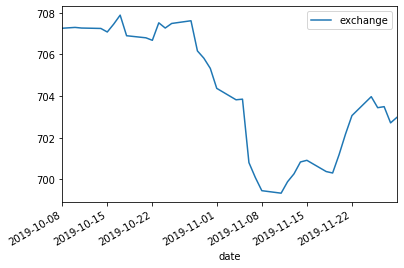

In [112]:
df[['currency','exchange']].plot(kind = 'line')

In [113]:
df['mvg30'] = df['exchange'].rolling(window = 30).mean()

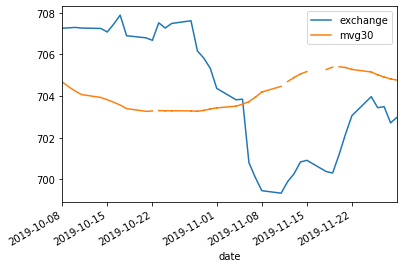

In [114]:
df[['exchange','mvg30']].plot(kind='line')

In [154]:
#取得美元和英镑的数据
with lite.connect('currency.sqlite') as db:
    df = pd.read_sql("SELECT * FROM currency_data WHERE currency IN('美元','英镑') LIMIT 100",con=db)
df.sample(10)

,date,currency,exchange
46,2019-11-20,英镑,906.34
39,2019-11-29,英镑,907.63
90,2019-11-13,美元,700.26
94,2019-11-07,美元,700.08
85,2019-11-20,美元,701.18
28,2019-10-22,美元,706.68
12,2019-11-13,美元,700.26
74,2019-10-11,英镑,880.94
40,2019-11-28,英镑,908.76
96,2019-11-05,美元,703.85


In [155]:
df.currency.value_counts()

美元    61
英镑    39
Name: currency, dtype: int64

In [156]:
#转换时间的类型
df['date'] = pd.to_datetime(df['date'],format = '%Y-%m-%d')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
date        100 non-null datetime64[ns]
currency    100 non-null object
exchange    100 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.5+ KB


In [160]:
#转换为Pivot Table
df2 = df.pivot_table(index = 'date', columns = 'currency')
df2.head()

exchange        
currency         美元      英镑
date                       
2019-10-08   707.26  871.82
2019-10-09   707.28  867.38
2019-10-10   707.30  866.98
2019-10-11   707.27  880.94
2019-10-14   707.25  892.94

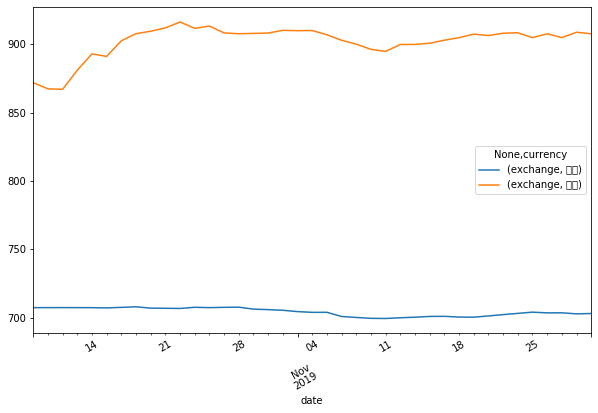

In [159]:
df2.plot(kind='line',rot =30,figsize= [10,6])